Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

In [17]:
import warnings
warnings.filterwarnings("ignore")

Loading Data

In [18]:
df = pd.read_csv("loan_default_ml_dataset.csv")
df.head()

,age,income,loan_amount,credit_score,employment_type,marital_status,loan_term_months,default
0,59,34018.0,30291,744.0,Unemployed,Single,36,1
1,49,41302.0,41679,NaN,Self-Employed,Divorced,24,0
2,35,97506.0,31289,460.0,Unemployed,Divorced,36,0
3,63,NaN,8389,477.0,Unemployed,Married,60,1
4,28,NaN,30683,NaN,Unemployed,Single,36,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1000 non-null   int64  
 1   income            950 non-null    float64
 2   loan_amount       1000 non-null   int64  
 3   credit_score      950 non-null    float64
 4   employment_type   1000 non-null   object 
 5   marital_status    1000 non-null   object 
 6   loan_term_months  1000 non-null   int64  
 7   default           1000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [20]:
df.shape

(1000, 8)

In [21]:
df.dtypes

age                   int64
income              float64
loan_amount           int64
credit_score        float64
employment_type      object
marital_status       object
loan_term_months      int64
default               int64
dtype: object

In [22]:
df.columns

Index(['age', 'income', 'loan_amount', 'credit_score', 'employment_type',
       'marital_status', 'loan_term_months', 'default'],
      dtype='object')

In [23]:
df.describe()

,age,income,loan_amount,credit_score,loan_term_months,default
count,1000.000000,950.00000,1000.000000,950.000000,1000.000000,1000.000000
mean,42.515000,89377.52000,28287.398000,581.324211,32.436000,0.233000
std,12.611059,33891.37743,12726.829545,158.971577,17.343549,0.422954
min,21.000000,30060.00000,5125.000000,300.000000,12.000000,0.000000
25%,32.000000,59985.00000,17075.250000,441.250000,12.000000,0.000000
50%,43.000000,87602.50000,29583.000000,580.000000,24.000000,0.000000
75%,53.000000,117031.50000,39051.750000,722.000000,36.000000,0.000000
max,64.000000,149797.00000,49976.000000,849.000000,60.000000,1.000000


In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.isnull().sum()

age                  0
income              50
loan_amount          0
credit_score        50
employment_type      0
marital_status       0
loan_term_months     0
default              0
dtype: int64

Target Distribution

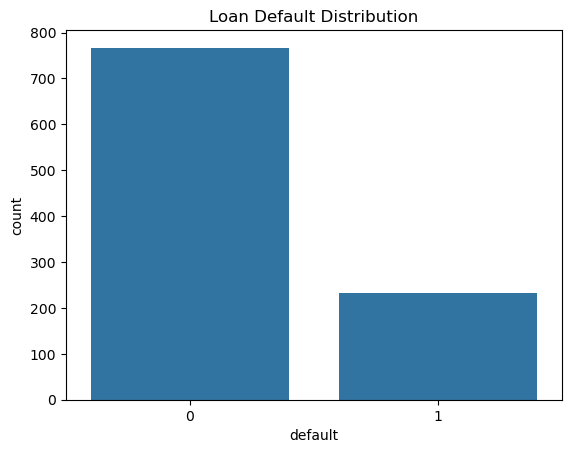

In [26]:
sns.countplot(x='default', data=df)
plt.title("Loan Default Distribution")
plt.show()

Business Insights Plot

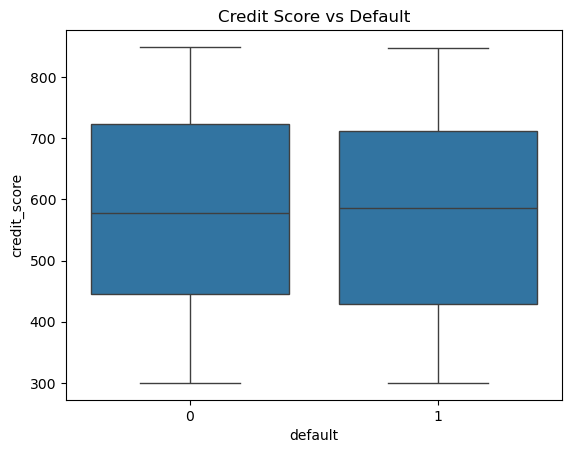

In [27]:
sns.boxplot(x='default', y='credit_score', data=df)
plt.title("Credit Score vs Default")
plt.show()

Handling Missing Values

In [28]:
df['income'].fillna(df['income'].median(), inplace=True)
df['credit_score'].fillna(df['credit_score'].median(), inplace=True)

Feature Engineering and Preprocessing

In [29]:
X = df.drop("default", axis=1)
y = df["default"]

In [30]:
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)

Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Class Imbalance Handling

In [33]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight = dict(enumerate(weights))

Training ML Models

In [34]:
log_reg = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(class_weight=class_weight))
])
log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'income', 'loan_amount', 'credit_score', 'loan_term_months'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['employment_type', 'marital_status'], dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight={0: np.float64(0.6514657980456026),
                                                  1: np.float64(2.150537634408602)}))])

In [35]:
dt = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=5))
])
dt.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'income', 'loan_amount', 'credit_score', 'loan_term_months'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['employment_type', 'marital_status'], dtype='object'))])),
                ('model', DecisionTreeClassifier(max_depth=5))])

In [36]:
rf = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        class_weight=class_weight
    ))
])
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'income', 'loan_amount', 'credit_score', 'loan_term_months'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['employment_type', 'marital_status'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight={0: np.float64(0.6514657980456026),
                                                      1: np.float64(2.150537634408602)},
                                        n_estimators=200))])

In [37]:
svm = Pipeline([
    ('preprocess', preprocessor),
    ('model', SVC(probability=True))
])
svm.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'income', 'loan_amount', 'credit_score', 'loan_term_months'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['employment_type', 'marital_status'], dtype='object'))])),
                ('model', SVC(probability=True))])

Model Comparision

In [38]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm
}

results = []
for name, model in models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))

pd.DataFrame(results, columns=["Model", "Accuracy"])

,Model,Accuracy
0,Logistic Regression,0.540
1,Decision Tree,0.740
2,Random Forest,0.760
3,SVM,0.765


Hyperparameter Tuning

In [39]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, None]
}

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

Threshold Optimization

In [40]:
y_probs = best_model.predict_proba(X_test)[:,1]
thresholds = np.arange(0.1, 0.9, 0.01)
losses = []

for t in thresholds:
    preds = (y_probs > t).astype(int)
    cm = confusion_matrix(y_test, preds)
    loss = cm[0][1]*1 + cm[1][0]*5
    losses.append(loss)

best_threshold = thresholds[np.argmin(losses)]
best_threshold

np.float64(0.1)

SHAP Explainability

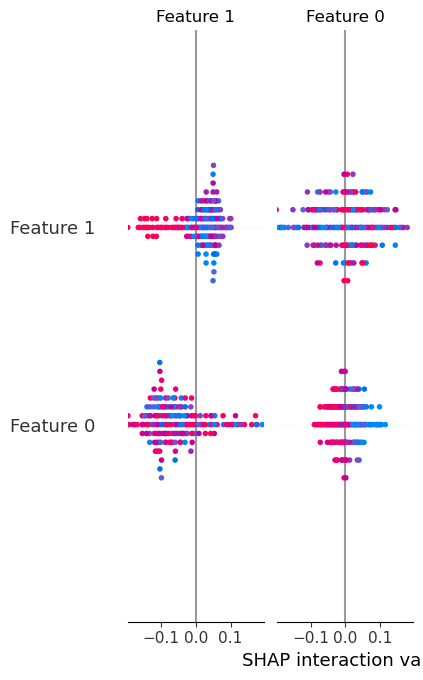

In [41]:
import shap

explainer = shap.Explainer(
    best_model.named_steps['model'],
    best_model.named_steps['preprocess'].transform(X_train)
)

shap_values = explainer(
    best_model.named_steps['preprocess'].transform(X_test)
)

shap.summary_plot(shap_values)

In [42]:
import joblib
joblib.dump(best_model, "credit_risk_model.joblib")

['credit_risk_model.joblib']

A/B Testing 

In [43]:
import random

def route(data):
    if random.random() < 0.5:
        return log_reg.predict(data), "Model_A"
    else:
        return best_model.predict(data), "Model_B"

In [44]:
def compute_loss(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[0][1]*1 + cm[1][0]*5

Model Monitoring

In [45]:
from scipy.stats import ks_2samp

stat, p = ks_2samp(
    X_train['credit_score'],
    X_test['credit_score']
)

print("Drift detected" if p < 0.05 else "No drift")

No drift
